使用 Python 实现 PLA：

In [9]:
import numpy as np
def pla(X, y):
    """
    感知器学习算法实现
    注意只能处理线性可分的数据集，输入线性不可分函数无法停止
    args:
        X - 训练数据集
        y - 目标标签值
    return:
        W - 权重系数
    """
    done = False
    # 初始化权重系数
    W = np.zeros(X.shape[1])
    # 循环
    while(done == False):
        done = True
        # 遍历训练数据集
        for index in range(len(X)):
            x = X[index]
            # 判定是否与目标值不符
            if x.dot(W) * y[index] <= 0:
                done = False
                # 修正权重系数
                W = W + y[index] * x
    return W

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def createTrainDatas(W, start, end, size = 10):
    """
    创建线性可分的训练数据集
    args:
        W - 目标权重系数
        start - 最小值
        end - 最大值
        size - 训练数据集大小
    return:
        X - 训练集特征值
        y - 训练集目标值
    """
    np.random.seed(42)
    '''
    随机生成 size个样本实数在范围 [start,end)
    size输出样本数目，为int或元组(tuple)类型，例如，size=(m,n,k), 则输出m*n*k个样本，缺省时输出1个 实数
    '''
    X = np.random.uniform(start, end, (size, W.shape[0]))
    y = np.sign(X.dot(W))
    return X, y

def buildLine(W, start, end, size = 100):
    """
    构建一条指定的二维直线
    args:
        W - 权重系数
        start - 最小值
        end - 最大值
        size - 组成线的点的数量
    return:
        x0, - 
    """
    x0 = np.linspace(start, end, size)
    if W[1] == 0:
        x1 = np.zeros(100)
    else:
        x1 = -W[0] * x0 / W[1]
    return x0, x1

创建线性可分的训练数据集：

In [17]:
import numpy as np
# 坐标轴起始点
start = -10
# 坐标轴结束点
end = 10
# 目标权重系数
W = np.array([5, 4])
# 创建线性可分的训练数据集
X, y = createTrainDatas(W, start, end)
print(X,y)

[[-2.50919762  9.01428613]
 [ 4.63987884  1.97316968]
 [-6.87962719 -6.88010959]
 [-8.83832776  7.32352292]
 [ 2.02230023  4.16145156]
 [-9.58831011  9.39819704]
 [ 6.64885282 -5.75321779]
 [-6.36350066 -6.3319098 ]
 [-3.91515514  0.49512863]
 [-1.36109963 -4.1754172 ]] [ 1.  1. -1. -1.  1. -1.  1. -1. -1. -1.]


计算权重系数：

In [19]:
W = pla(X, y)
W

array([16.47819278, 14.08657577])

可视化：

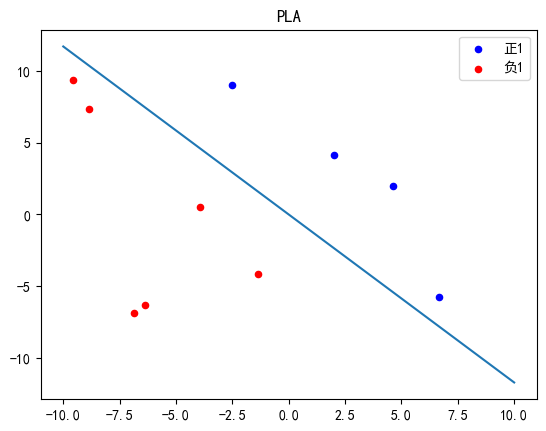

In [33]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 选择一个本地的支持中文的字体 常见的中文黑体字型
plt.rcParams['axes.unicode_minus']=False    # 默认是使用Unicode负号，设置正常显示字符，如正常显示负号

x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]
plt.title('PLA')
"""
使用matplotlib库 pyplot绘制散点图,以x1,y1坐标为散点图中点, c=b为蓝色 'r'(为红色 
marker)='o' 表示散点形状
s=20 表示散点的大小 面积大小
"""
p1 = plt.scatter(x1, y1, c='b', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='r', marker='o', s=20)
x3, y3 = buildLine(W, start, end)
plt.plot(x3, y3)
plt.legend([p1, p2], ["正1", "负1"], loc="upper right")
plt.show()

scikit-learn 实现：

In [35]:
from sklearn.linear_model import Perceptron

# 初始化感知器
clf = Perceptron(fit_intercept=False)
# 拟合训练集
clf.fit(X, y)
# 权重系数
W = clf.coef_[0]
W

array([6.36350066, 6.3319098 ])

可视化：

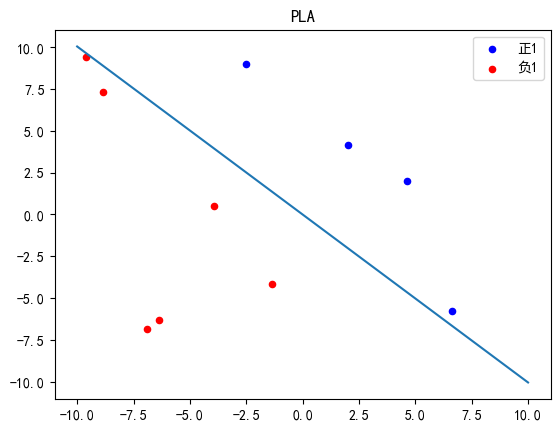

In [37]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 选择一个本地的支持中文的字体
plt.rcParams['axes.unicode_minus']=False    # 默认是使用Unicode负号，设置正常显示字符，如正常显示负号

x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]
plt.title('PLA')
p1 = plt.scatter(x1, y1, c='b', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='r', marker='o', s=20)
x3, y3 = buildLine(W, start, end)
plt.plot(x3, y3)
plt.legend([p1, p2], ["正1", "负1"], loc="upper right")
plt.show()

感知器学习算法演示：

In [ ]:
import numpy as np

def plaReturn(X, y):
    """
    感知器学习算法实现
    注意只能处理线性可分的数据集，输入线性不可分函数无法停止
    args:
        X - 训练数据集
        y - 目标标签值
    return:
        Ws - 权重系数数组
        errors - 错误数据下标数组
    """
    done = False
    # 初始化权重系数
    W = np.zeros(X.shape[1])
    Ws = np.array([W])
    errors = []
    # 循环
    while(done == False):
        done = True
        # 遍历训练数据集
        for index in range(len(X)):
            x = X[index]
            # 判定是否与目标值不符
            if x.dot(W) * y[index] <= 0:
                done = False
                # 修正权重系数
                W = W + y[index] * x
                Ws = np.insert(Ws, len(Ws), values=W, axis=0)
                errors.append(index)
    return Ws, errors

简单数据集：

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

%matplotlib notebook

start = -10
end = 10
W = np.array([5, 4])
X, y = createTrainDatas(W, start, end)
x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]

Ws, errors = plaReturn(X, y)
fig = plt.figure()
plt.title('PLA')
plt.scatter(x1, y1, c='b', marker='o', s=20)
plt.scatter(x2, y2, c='r', marker='o', s=20)
line, = plt.plot(0, 0, markersize=0, label='W')
error, = plt.plot(0, 0, c='k', marker='x', markersize=0)

def update(i):
    x3, y3 = buildLine(Ws[i], start, end)
    line.set_data(x3, y3)
    line.set_label("第%d次更新W"%(i + 1))
    if i < len(errors) :
        error.set_markersize(14)
        error.set_data(X[errors[i]][0], X[errors[i]][1])
    else:
        error.set_markersize(0)
        error.set_data(0, 0)
    plt.legend(loc="upper right")
    return line, error,

ani = animation.FuncAnimation(fig, update, range(0, len(Ws)), interval=1000, blit=True, repeat=False)
ani.save('pla_simple.gif')
plt.legend(loc="upper right")
plt.show()

复杂数据集：

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

start = -10
end = 10
W = np.array([5, 4])
X, y = createTrainDatas(W, start, end, size=200)
x1 = X[y>0][:, 0]
y1 = X[y>0][:, 1]
x2 = X[y<0][:, 0]
y2 = X[y<0][:, 1]

Ws, errors = plaReturn(X, y)
fig = plt.figure()
plt.title('PLA')
p1 = plt.scatter(x1, y1, c='b', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='r', marker='o', s=20)
line, = plt.plot(0, 0, markersize=0, label='W')
error, = plt.plot(0, 0, c='k', marker='x', markersize=0)

ani = animation.FuncAnimation(fig, update, range(0, len(Ws)), interval=1000, blit=True, repeat=False)
ani.save('pla.gif')
plt.legend(loc="upper right")
plt.show()